In [6]:
import pandas as pd
demo = pd.read_csv("data/iris.csv")
X=demo.drop('variety',axis=1)
y=demo['variety']
demo.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
demo.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
demo.skew()

sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64

In [10]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", DecisionTreeClassifier(max_depth=5)),    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.9666666666666667
Training Accuracy
0.9916666666666667


In [7]:
X_train.shape

(120, 4)

In [8]:
#Build Final Model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
scoresrf = cross_val_score(pipe, X_train, y_train, cv=10,scoring='f1_weighted')
print(scoresrf)

[0.91534392 0.91534392 0.91534392 0.91534392 0.91534392 1.
 1.         0.91798942 0.91212121 1.        ]


In [9]:
import numpy as np
np.mean(scoresrf)

0.9406830206830208

In [30]:
print("Bias Error")
print(1-np.mean(scoresrf))
print("Variance Error")
print(np.var(scoresrf))

Bias Error
0.09481962481962469
Variance Error
0.006729184721536811


In [14]:
pipe.fit(X_train,y_train)
pipe

Pipeline(steps=[('pt', PowerTransformer()),
                ('lr', DecisionTreeClassifier(max_depth=5))])

In [15]:
pipe.score(X_test,y_test)

0.9333333333333333

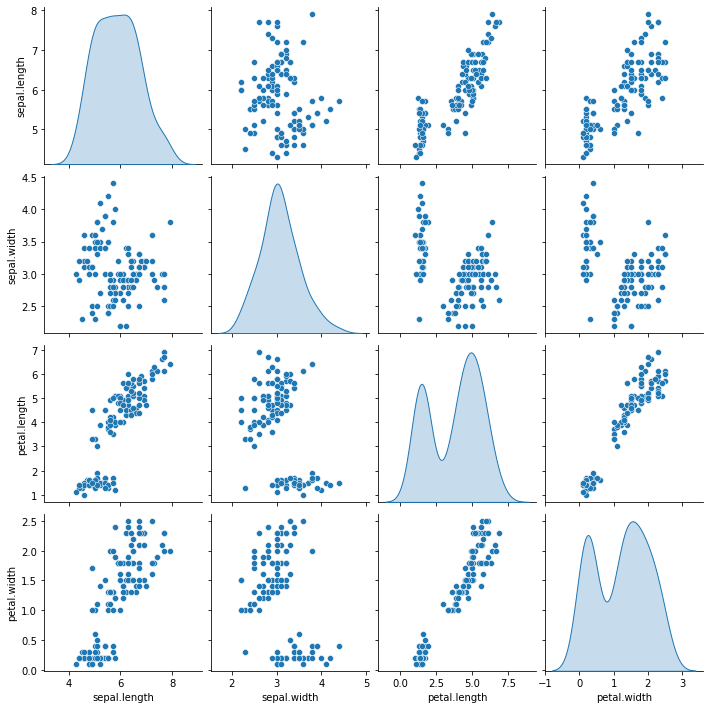

In [16]:
import seaborn as sns
sns.pairplot(X_train,diag_kind='kde')

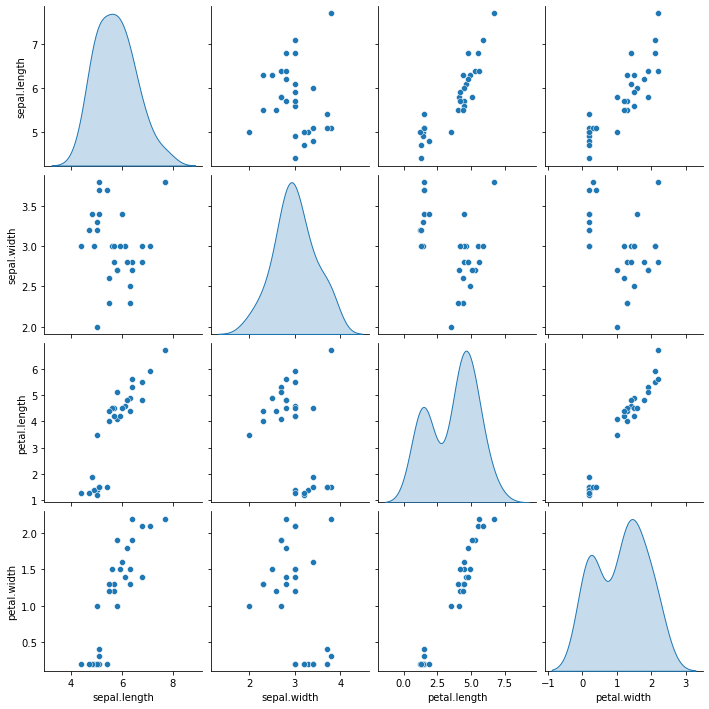

In [17]:
sns.pairplot(X_test,diag_kind='kde')

In [18]:
X_train.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,120.000000,120.000000,120.000000,120.000000
mean,5.870000,3.072500,3.780833,1.218333
std,0.841527,0.434241,1.785859,0.775137
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.500000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
X_test.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,30.000000,30.000000,30.000000,30.000000
mean,5.736667,2.996667,3.666667,1.123333
std,0.776146,0.444494,1.706849,0.715678
min,4.400000,2.000000,1.200000,0.200000
25%,5.100000,2.725000,1.500000,0.225000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.275000,3.275000,4.800000,1.575000
max,7.700000,3.800000,6.700000,2.200000


In [20]:
predicted = pipe.predict(X_test)
print(predicted)

['Versicolor' 'Virginica' 'Setosa' 'Versicolor' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa'
 'Setosa' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Versicolor'
 'Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica']


In [21]:
pipe.predict_proba(X_test)

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.85      0.92        13
   Virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [57]:
from sklearn.metrics import recall_score,precision_score,f1_score
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

[1.    1.    0.875]
[1.         0.92307692 1.        ]
[1.         0.96       0.93333333]


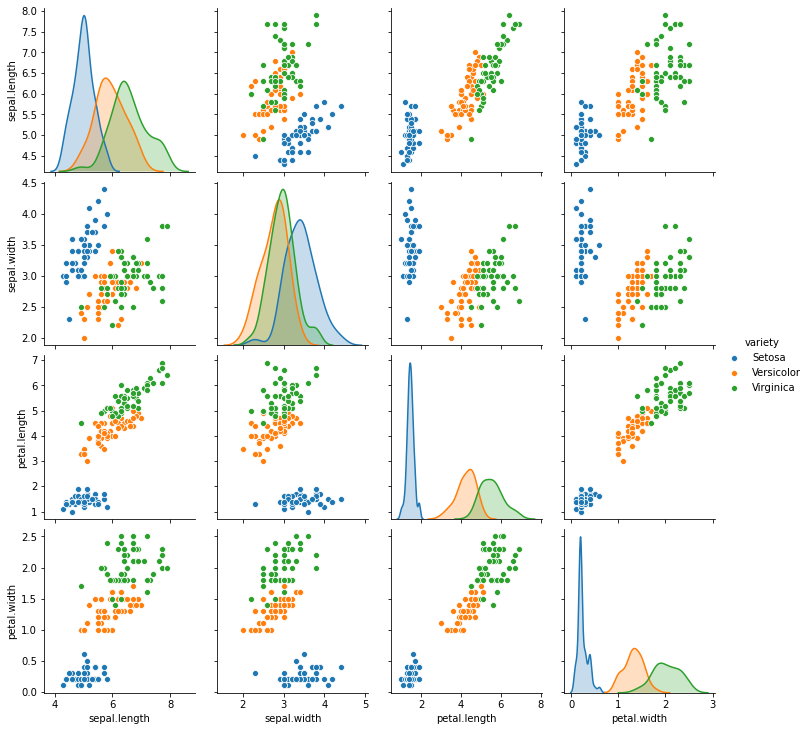

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(demo,diag_kind='kde',hue='variety')

Automatically created module for IPython interactive environment


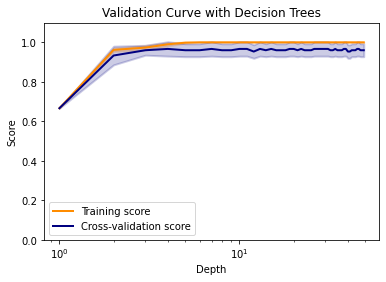

In [102]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [11]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline((
("sc", StandardScaler()),    
("knn", KNeighborsClassifier(n_neighbors=8)),    
))
pipe.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
scoresrf = cross_val_score(pipe, X_train, y_train, cv=10,scoring='f1_weighted')
print(scoresrf)
import numpy as np
np.mean(scoresrf)

[1.         0.91534392 0.91534392 0.91534392 0.91534392 1.
 1.         0.83333333 1.         1.        ]


0.9494708994708996

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
a = np.arange(1,15)
model = KNeighborsClassifier()
grid = GridSearchCV(cv=10,estimator=model, scoring='f1_weighted',param_grid=dict(n_neighbors=a))
grid.fit(X_train, y_train)
#print(grid)
# summarize the results of the grid search
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print(grid.best_score_)

11
{'n_neighbors': 11}
0.9748677248677249


Automatically created module for IPython interactive environment


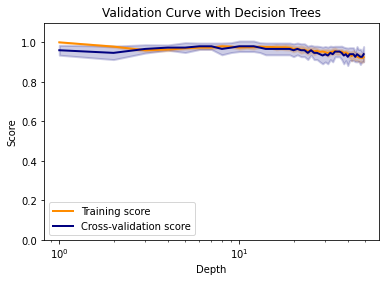

In [13]:

print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()